In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [59]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    #Calculate the loss. You can calculate the loss using mse or mae
    e = (y-tx.dot(w))**2
    #print(y.shape, tx.dot(w))
    return np.mean(e)
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE / MAE
    # ***************************************************
    raise NotImplementedError


# 2 Grid Search

Fill in the function `grid_search()` below:

In [60]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    loss = np.zeros((len(w0),len(w1)))
    min_loss = np.inf
    w_0 = 0
    w_1 = 0
    for i in range(len(w0)):
        for j in range(len(w1)):
            loss[i][j] = compute_loss(y,tx,[w0[i],w1[j]])
            if loss[i][j] < min_loss:
                min_loss = loss[i][j]
                w_0 = w0[i]
                w_1 = w1[i]
    #raise NotImplementedError
    return loss

In [61]:
compute_loss(y,tx,[1,1])

5412.926156644146

Let us play with the grid search demo now!

Grid Search: loss*=84.84896629356496, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.005 seconds


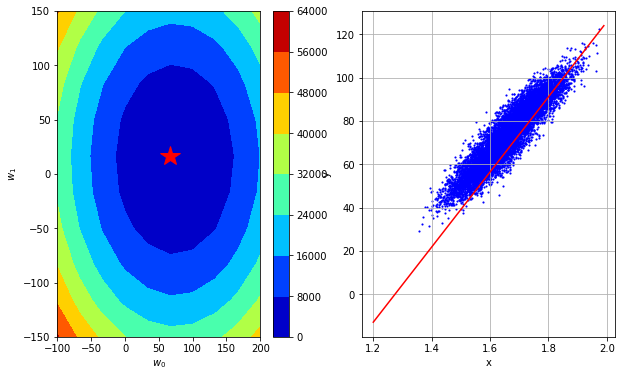

In [62]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [100]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and error vector
    # ***************************************************
    e = (y-tx.dot(w))
    return np.transpose(tx).dot(e)/len(y)
    raise NotImplementedError

In [101]:
compute_gradient(y,tx,[0,0])

array([73.293922  , 13.47971243])

Please fill in the functions `gradient_descent` below:

In [105]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        loss = compute_loss(y,tx, w)
        grad = compute_gradient(y,tx,w)
        
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w + gamma*compute_gradient(y,tx,w)
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [118]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
# Initialization
w_initial = np.array([0,0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=5584.473425518335, w0=7.329392200210518, w1=1.3479712434988933
Gradient Descent(1/49): loss=4529.270112060007, w0=13.925845180399984, w1=2.5611453626479
Gradient Descent(2/49): loss=3674.55542815876, w0=19.8626528625705, w1=3.653002069882006
Gradient Descent(3/49): loss=2982.236534198752, w0=25.205779776523965, w1=4.635673106392702
Gradient Descent(4/49): loss=2421.4582300911447, w0=30.014593999082088, w1=5.520077039252333
Gradient Descent(5/49): loss=1967.2278037639826, w0=34.342526799384395, w1=6.316040578826
Gradient Descent(6/49): loss=1599.3011584389812, w0=38.237666319656476, w1=7.0324077644423
Gradient Descent(7/49): loss=1301.28057572573, w0=41.74329188790135, w1=7.677138231496972
Gradient Descent(8/49): loss=1059.8839037279963, w0=44.89835489932173, w1=8.257395651846174
Gradient Descent(9/49): loss=864.3525994098322, w0=47.737911609600076, w1=8.77962733016046
Gradient Descent(10/49): loss=705.9722429121194, w0=50.29351264885059, w1=9.24963584064331

In [125]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4 Stochastic gradient descent

In [122]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    # ***************************************************
    e = (y-tx.dot(w))
    return np.transpose(tx).dot(e)/len(y)


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        for minibatch_y, minibatch_tx in batch_iter(y, tx, len(y)):
            loss = compute_loss(minibatch_y, minibatch_tx, w)
            grad = compute_gradient(minibatch_y, minibatch_tx,w) 
            w = w + gamma*compute_gradient(y,tx,w)
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    
    #raise NotImplementedError
    return losses, ws

In [123]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=5584.473425518334, w0=51.30574540147362, w1=9.435798704492251
Gradient Descent(1/49): loss=530.6049242179207, w0=66.69746902191571, w1=12.266538315839991
Gradient Descent(2/49): loss=75.75675910088256, w0=71.31498610804834, w1=13.115760199244328
Gradient Descent(3/49): loss=34.82042424034894, w0=72.70024123388814, w1=13.370526764265632
Gradient Descent(4/49): loss=31.136154102900914, w0=73.11581777164007, w1=13.446956733772023
Gradient Descent(5/49): loss=30.80456979053059, w0=73.24049073296565, w1=13.469885724623941
Gradient Descent(6/49): loss=30.77472720241726, w0=73.27789262136334, w1=13.476764421879516
Gradient Descent(7/49): loss=30.77204136948706, w0=73.28911318788263, w1=13.478828031056189
Gradient Descent(8/49): loss=30.771799644523348, w0=73.29247935783842, w1=13.47944711380919
Gradient Descent(9/49): loss=30.77177788927661, w0=73.29348920882516, w1=13.47963283863509
Gradient Descent(10/49): loss=30.7717759313044, w0=73.29379216412119, w1=13.47968

In [124]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers

### Exercise 5


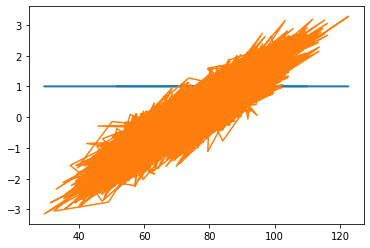

In [98]:
plt.plot(y,tx)

# 6 Subgradient Descent

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)